In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Style for plots
sns.set(style='whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Titanic Dataset
file_path='/content/drive/MyDrive/Projects/Titanic-Dataset.csv'
df=pd.read_csv(file_path)



In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


observations:
The dataset contains 891 passenger records and 12 columns.
Most features have complete data, but some have missing values:
Age and cabin have some missing data we will impute or drop it when doing further analysis.
Cabin has many missing values (only 204 out of 891) and may need to be dropped or handled differently. so not useful we can drop this feature.
o	Embarked is missing 2 values.
•	Name, Sex, Ticket, Cabin, and Embarked are categorical variables (object dtype).
•	Numerical variables include: Age, Fare, Pclass, SibSp, Parch, etc.
•	Memory usage is about 83.7 KB, which is small and suitable for in-memory processing.


In [6]:
# Check missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Cabin has many missing values (only 204 out of 891) and may need to be dropped or handled differently. so not useful we can drop this feature.
on the other hand age can be imputed through mean.

In [7]:
# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

<ipython-input-7-32cb2eabbaa6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-7-32cb2eabbaa6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [8]:
# Confirm no missing values remain
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
# Check how many duplicates exist
duplicates = df.duplicated().sum()
print(f"Total duplicates: {duplicates}")

Total duplicates: 0


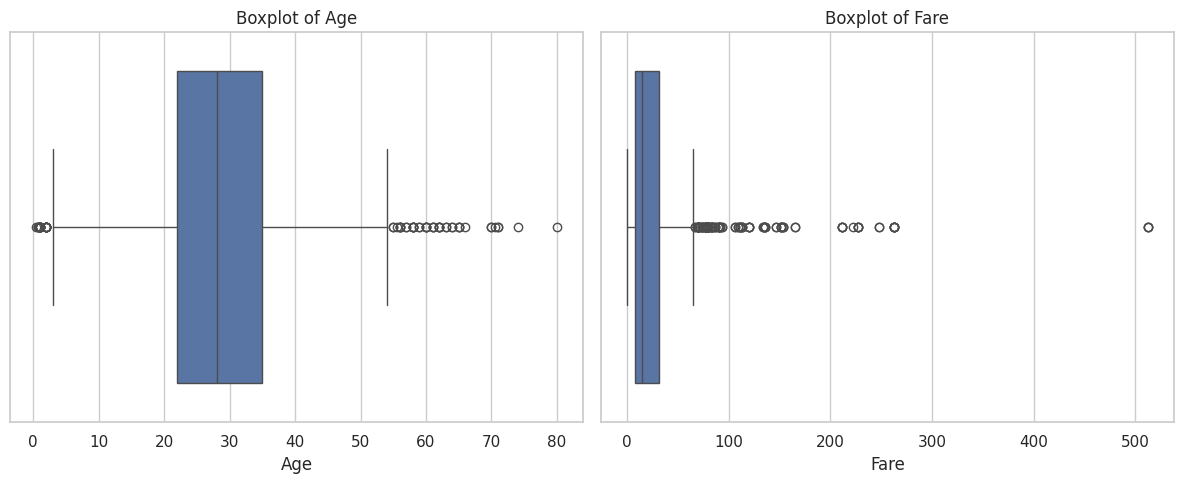

In [10]:
# Identify outliers visually with boxplot
# Set figure size and layout
plt.figure(figsize=(12, 5))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")

# Show both plots
plt.tight_layout()
plt.show()

Observation: Boxplots of Age and Fare
Age:

The majority of passengers fall between 20 and 40 years old.

There are a few outliers, especially younger children (around age 0) and older passengers (above 60).

The distribution is slightly right-skewed, indicating more younger passengers than older ones.

Fare:

Most passengers paid a fare below 100 units, with the interquartile range (IQR) concentrated in that region.

There are several extreme outliers, including one passenger who paid a fare close to £500.

This suggests that while most passengers travelled in economy or standard class, a few paid premium fares, likely for first-class cabins.

These outliers are important and could be retained for modeling, as they might relate to survival or passenger class.

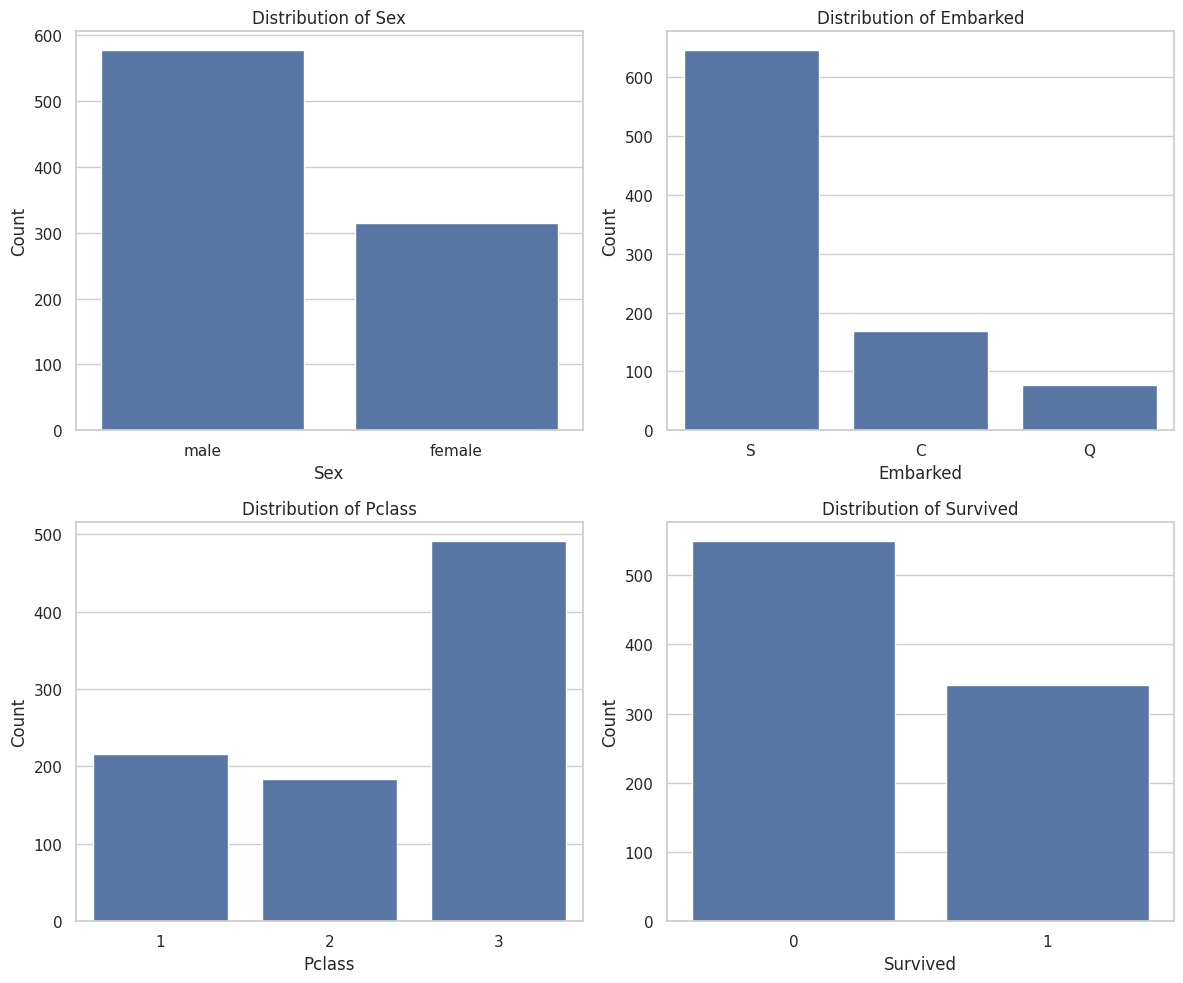

In [11]:
#bar plots for categorical variables
categorical_vars = ['Sex', 'Embarked', 'Pclass', 'Survived']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows x 2 columns
axes = axes.flatten()  # Flatten to iterate easily

# Plot each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Observation: Distributions of Categorical Variables
Sex:

The dataset contains significantly more male passengers (~580) than female passengers (~310).

This imbalance is important when analyzing survival rates by gender.

Embarked:

Most passengers embarked from port S (Southampton), followed by C (Cherbourg), and the fewest from Q (Queenstown).

Indicates Southampton was the primary boarding location.

Pclass:

A large portion of passengers belonged to 3rd class (~490).

Fewer passengers were in 1st.

This skew may influence survival analysis and fare distribution.

Survived:

About 550 passengers did not survive, while around 340 survived.

The dataset is slightly imbalanced, with more non-survivors than survivors.

These distributions are useful for identifying patterns in passenger demographics and will help guide further analysis like survival prediction.

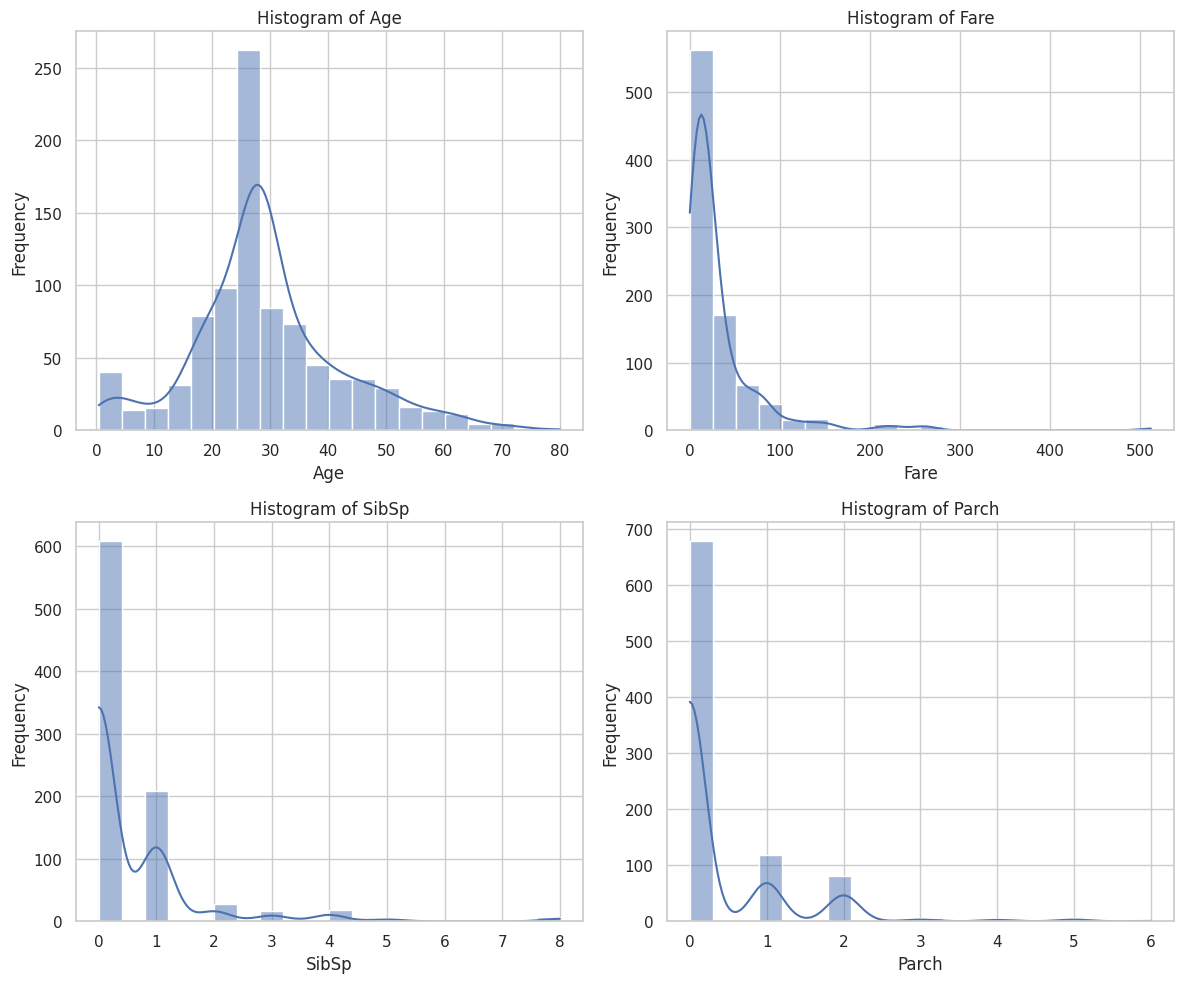

In [12]:
#histograms for numerical features
numeric_vars = ['Age', 'Fare', 'SibSp', 'Parch']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array to 1D for easy iteration

# Plot each histogram
for i, var in enumerate(numeric_vars):
    sns.histplot(df[var], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df['Sex_encoded'] = df['Sex'].map({'male': 0, 'female': 1})

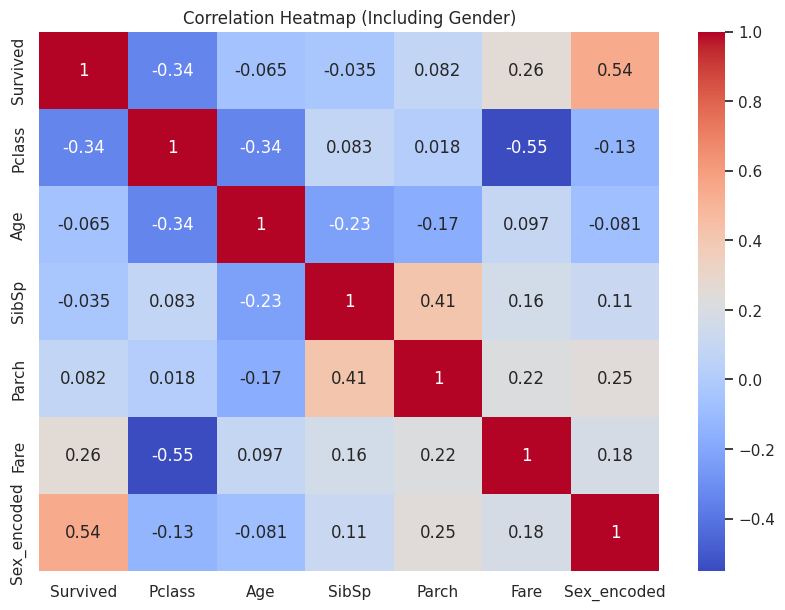

In [ ]:
# Include only numeric columns (including Sex_encoded)
numeric_df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded']]

# Plot correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Including Gender)')
plt.show()

In [ ]:
df[['Sex_encoded', 'Survived']].corr()

,Sex_encoded,Survived
Sex_encoded,1.000000,0.543351
Survived,0.543351,1.000000


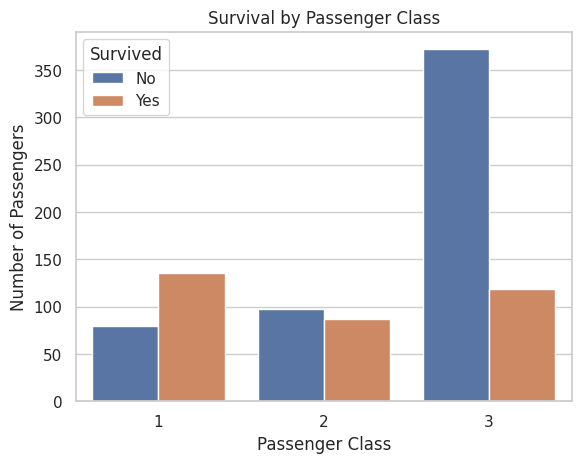

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()